First Data Exploration

This notebook performs the first explorations and transformations on the feature and target datasets. First, we start importing the CSV files from the parent directory. This is done to avoid the proliferation of large CSV files throught the whole repo. 

In [3]:
import sys
print(sys.executable)

c:\ProgramData\anaconda3\python.exe


In [26]:
import pandas as pd
import os

# Get the path of the current script and its parent directory
current_dir = os.getcwd() #os.path.dirname(__file__)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# Construct the full path to the CSV files
csv_path_X = os.path.join(parent_dir, 'X_train_update.csv')
csv_path_Y = os.path.join(parent_dir, 'Y_train_CVw08PX.csv')

# Read the CSV file into the DataFrames
dfX = pd.read_csv(csv_path_X, index_col=0)
dfY = pd.read_csv(csv_path_Y, index_col=0)

# Display the DataFrames
display(dfX.head())
display(dfY.head())


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


Then we characterize the features dataset dfX looking for data types, missing values, etc. 

In [27]:
dfX.info()
print("Duplicates: ")
print(dfX.duplicated().sum())
print("Missing values: ")
print(dfX.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
Duplicates: 
0
Missing values: 
designation        0
description    29800
productid          0
imageid            0
dtype: int64


There are no duplicates, but since there are missing values in the field "description", first we replace all the missing values with an empty array "", and then we concatenate the fields "deisgnation" and "description". 

In [28]:
dfX.designation.fillna("")
design_descript = []
print("Designation/Description concatenation. ")
for i in range(dfX.shape[0]):
    #print(i,df_sample_designation.iloc[i],df_sample_description.iloc[i])
    design_descript.append(
        str(dfX.designation.iloc[i]) + " " + 
        str(dfX.description.iloc[i])
    )
dfX["design_descrip"] = pd.Series(design_descript)
print("Concatenation done.")
print("New characteristic of the features DataFrame: ")
dfX.info()

Designation/Description concatenation. 
Concatenation done.
New characteristic of the features DataFrame: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   designation     84916 non-null  object
 1   description     55116 non-null  object
 2   productid       84916 non-null  int64 
 3   imageid         84916 non-null  int64 
 4   design_descrip  84916 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.9+ MB


Regarding the target DataFrame, we have the following information: 

In [29]:
dfY.info()
print("Duplicates: ")
print(dfY.duplicated().sum())
print("Missing values: ")
print(dfY.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
Duplicates: 
84889
Missing values: 
prdtypecode    0
dtype: int64


No missing values and no duplicates, ideal for a preliminary characterization counting the number of modalities of the target "prdtypecode" and with a count bar plot. 

Modalities and count for each one: 


2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: prdtypecode, dtype: int64

Modalities and percentage of total for each one: 
2583    12.022469
1560     5.974139
1300     5.941165
2060     5.879928
2522     5.875218
1280     5.735079
2403     5.622026
2280     5.605540
1920     5.067361
1160     4.655189
1320     3.816713
10       3.669509
2705     3.251448
1140     3.145461
2582     3.048895
40       2.953507
2585     2.939375
1302     2.933487
1281     2.437703
50       1.979603
2462     1.673418
2905     1.026897
60       0.979792
2220     0.970371
1301     0.950351
1940     0.945640
1180     0.899713
Name: prdtypecode, dtype: float64


<Axes: >

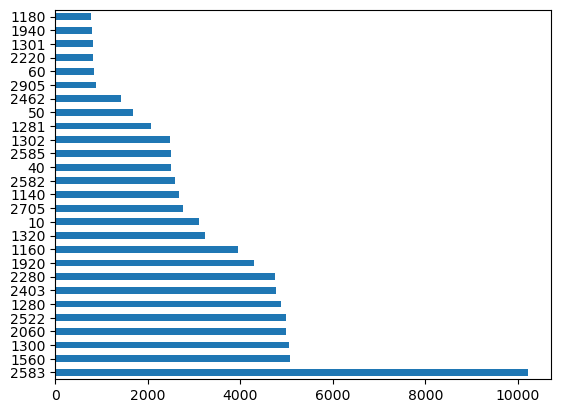

In [30]:
print("Modalities and count for each one: ")
display(dfY.prdtypecode.value_counts())
print("Modalities and percentage of total for each one: ")
print(100*dfY.prdtypecode.value_counts(normalize=True))
dfY.prdtypecode.value_counts().plot(kind='barh')

The dataset is strongly disbalanced. This will be taken into account for further analyses. We finish with the elimination of feature "description" from the DataFrame dfX and the column concatenation of dfX and dfY to obtain a new unified DataFrame dfXY exported to the file Xy_train.csv

In [31]:
dfX = dfX.drop(["description"],axis=1)
dfXY = pd.concat([dfX,dfY],axis=1)
display(dfXY.head())

,designation,productid,imageid,design_descrip,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...,1280
4,La Guerre Des Tuques,278535884,1077757786,La Guerre Des Tuques Luc a des id&eacute;es de...,2705
